In [334]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import matplotlib.cm as cm

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [336]:
arwu_df = pd.read_excel('shanghai Ranking.xlsx')
the_df = pd.read_excel('Times Higher Education.xlsx')
cwur_df = pd.read_excel('Word Rank University.xlsx')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [338]:
shapes = {
    'shanghai Ranking': arwu_df.shape,
    'Times Higher Education': the_df.shape,
    'Word Rank University': cwur_df.shape
}

shapes

{'shanghai Ranking': (1000, 6),
 'Times Higher Education': (1591, 20),
 'Word Rank University': (2000, 9)}

# ------------------- cwur_df = 'Word Rank University -----------------------------

In [340]:
cwur_df

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,-,-,-,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,-,1322,-,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,-,-,-,1922,66.0


### Viewing the dataframe -- Word Rank University
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [342]:
cwur_df.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


## 1. Data Profiling: cwur_df = 'Word Rank University
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

In [344]:
cwur_df.isna().sum()

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [345]:
cwur_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [346]:
cwur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


## Data Quality Checks --- Word Rank University'-- cwur_df-
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable.

Here are typical steps involved in checking data quality:

## 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [349]:
# My dataset is Reliabel - i take it from kaggel website and it's trustness

## 2. Timeliness:
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [351]:
# my dataset is up to date

## 3. Consistency:
Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.

#### the DS is don't achive the consistancy between each other

In [354]:
print("Word Rank University\n")
print(cwur_df.dtypes)
print("\nshanghai Ranking\n")
print(arwu_df.dtypes)

print("\nTime Higher Ranking\n")
print(the_df.dtypes)


Word Rank University

World Rank             object
University Names       object
Location               object
National Rank           int64
Educational Rank       object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object

shanghai Ranking

Ranking                    object
University Name            object
National/Regional Rank     object
Total Score               float64
LOGO                       object
University Detail          object
dtype: object

Time Higher Ranking

Rank                               object
University Name                    object
ranking-institution-title href     object
Location                           object
sdg-score-multi__number           float64
sdg-score-multi__value             object
sdg-score-multi__number 2         float64
sdg-score-multi__value 2           object
sdg-score-multi__number 3         float64
sdg-score-multi__value 3           object
sdg-score-multi

## 4. Relevance:
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

##### 1. Sample Appropriateness:Confirm that your data sample aligns with your analysis objectives.(The data is collected from all countries around the world.)

In [357]:
cwur_df['Location '].value_counts()

Location 
USA                332
China              314
Japan              114
United Kingdom      93
France              76
                  ... 
Uruguay              1
Iceland              1
Armenia              1
Luxembourg           1
North Macedonia      1
Name: count, Length: 95, dtype: int64

## 5. Uniqueness:
All "world rank university' file is unique (no duplicate)

In [359]:
cwur_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [360]:
cwur_df.duplicated().sum()

0

# 6. Completeness:
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.



In [362]:
cwur_df.isnull().sum()

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [363]:
cwur_df.isna().sum()

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [364]:
def clean_rank_column(column):
    column = column.replace({' ': 0, '-':0}).astype('int64')
    return column
    
rank_columns = ['Educational Rank', 'Employability Rank', 'Faculty Rank', 'Research Rank']
for col in rank_columns:
    cwur_df[col] = clean_rank_column(cwur_df[col])

print(cwur_df[rank_columns].isnull().sum())

Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
dtype: int64


In [365]:
cwur_df.isna().sum()

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [366]:
cwur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   int64  
 5   Employability Rank  2000 non-null   int64  
 6   Faculty Rank        2000 non-null   int64  
 7   Research Rank       2000 non-null   int64  
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 140.8+ KB


In [367]:
cwur_df.tail()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,0,0,0,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,0,1322,0,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,0,0,0,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,0,0,0,1922,66.0
1999,2000Top 9.8%,Gebze Technical University,Turkey,55,0,0,0,1923,66.0


# 7. Check Accuracy:
Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

The process includes:

Validating the appropriateness of data types for the dataset.
Identifying outliers using established validation rule

In [369]:
cwur_df.dtypes

World Rank             object
University Names       object
Location               object
National Rank           int64
Educational Rank        int64
Employability Rank      int64
Faculty Rank            int64
Research Rank           int64
Score                 float64
dtype: object

#### the World Rank was in this format - "1Top 0.1% ", we split the world rank and persentg each one in seperate colomn

In [371]:
cwur_df.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [372]:

def spl_rank(x):
    return int(x.split('Top')[0].strip())

cwur_df['Rank'] = cwur_df['World Rank'].apply(spl_rank)

def clean_world_rank(x):
    return x.split('Top')[1].strip()

cwur_df['World Rank'] = cwur_df['World Rank'].apply(clean_world_rank)

cwur_df.rename(columns={'World Rank': 'persntig'}, inplace=True)
cwur_df['persntig'] = cwur_df['persntig'].str.replace('%', '').astype(float)
cwur_df.head(2)


,persntig,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score,Rank
0,0.1,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0,1
1,0.1,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7,2


In [373]:
cwur_df.head()

,persntig,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score,Rank
0,0.1,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0,1
1,0.1,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7,2
2,0.1,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2,3
3,0.1,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1,4
4,0.1,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3,5


In [374]:
# Switch two columns.
if 'Rank' in cwur_df.columns and 'persntig' in cwur_df.columns:
    cwur_df = cwur_df[['Rank', 'persntig'] + [col for col in cwur_df.columns if col not in ['persntig', 'Rank']]]

cwur_df.head(2)

,Rank,persntig,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,0.1,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2,0.1,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7


In [375]:
#clean_World_rank = lambda x: x.split('\n')[0]
cwur_df['University Names'] = cwur_df['University Names'].apply(lambda x: x.split('\n')[0])

In [376]:
cwur_df.head(10)

,Rank,persntig,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,0.1,Harvard University,USA,1,1,1,1,1,100.0
1,2,0.1,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,0.1,Stanford University,USA,3,11,4,2,2,95.2
3,4,0.1,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,0.1,University of Oxford,United Kingdom,2,7,27,9,4,93.3
5,6,0.1,Princeton University,USA,4,5,16,6,82,92.6
6,7,0.1,University of Chicago,USA,5,8,15,22,28,92.1
7,8,0.1,Columbia University,USA,6,12,14,10,13,91.6
8,9,0.1,University of Pennsylvania,USA,7,14,8,45,12,91.2
9,10,0.1,Yale University,USA,8,6,35,13,21,90.8


In [377]:
cwur_df['University Names'].isnull().sum()

0

In [378]:
cwur_df['National Rank'].value_counts()

National Rank
1      95
2      73
3      61
4      54
5      48
       ..
318     1
317     1
316     1
315     1
332     1
Name: count, Length: 332, dtype: int64

<Axes: ylabel='Score'>

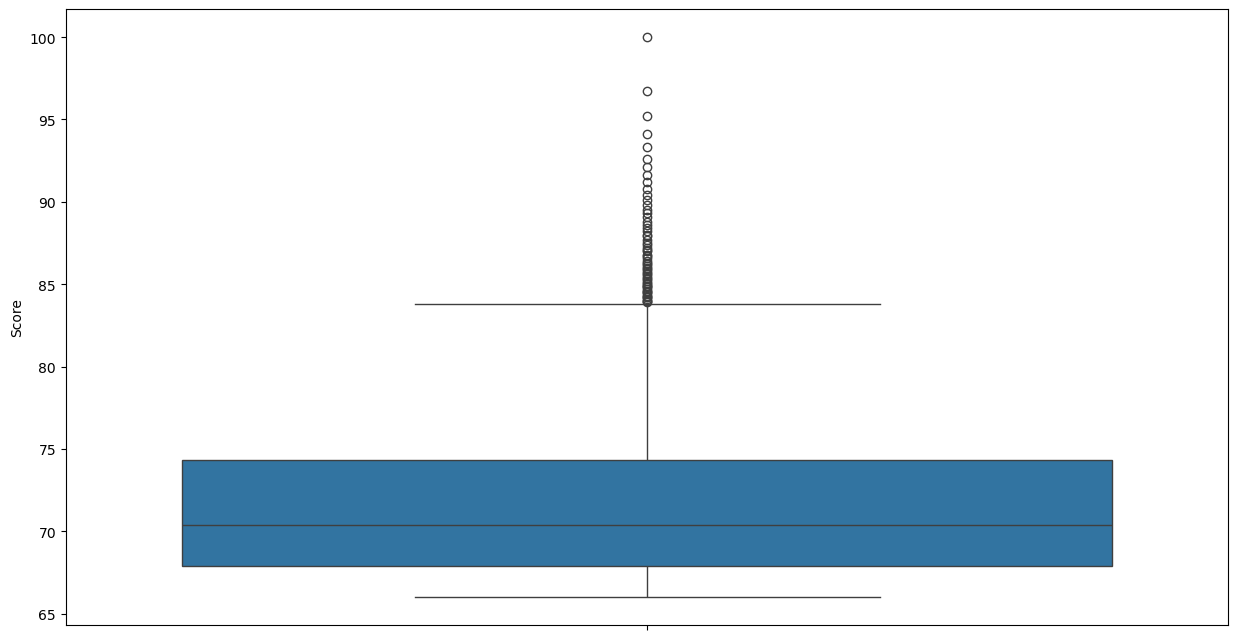

In [379]:
plt.figure(figsize=(15,8))

sns.boxplot(
    cwur_df,
    y="Score",
)

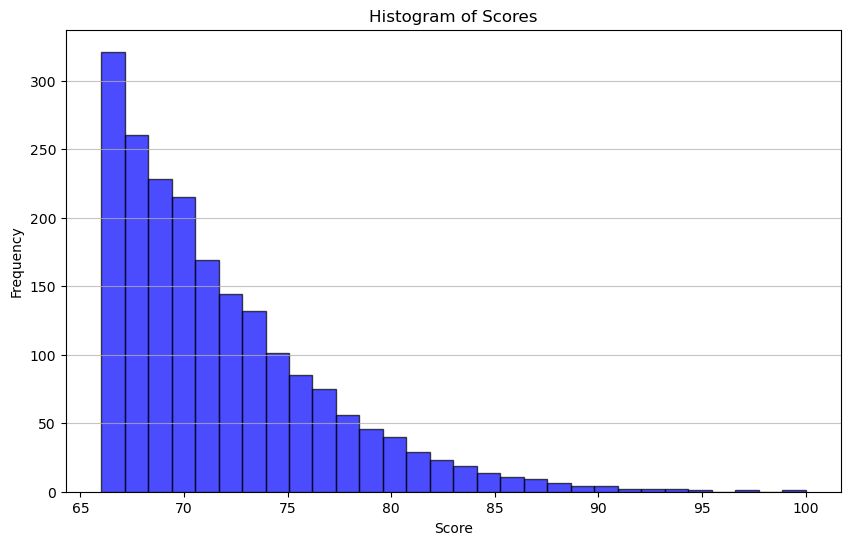

In [380]:
plt.figure(figsize=(10, 6)) 
plt.hist(cwur_df['Score'], bins=30, color='blue', edgecolor='black', alpha=0.7)  # رسم الهيستوغرام

plt.title('Histogram of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')


plt.grid(axis='y', alpha=0.75)
plt.show()

### Scores from 90-100 is Pattern outliers, not human or bussiness

In [382]:
cwur_df.head()

,Rank,persntig,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,0.1,Harvard University,USA,1,1,1,1,1,100.0
1,2,0.1,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,0.1,Stanford University,USA,3,11,4,2,2,95.2
3,4,0.1,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,0.1,University of Oxford,United Kingdom,2,7,27,9,4,93.3


In [383]:
cwur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                2000 non-null   int64  
 1   persntig            2000 non-null   float64
 2   University Names    2000 non-null   object 
 3   Location            2000 non-null   object 
 4   National Rank       2000 non-null   int64  
 5   Educational Rank    2000 non-null   int64  
 6   Employability Rank  2000 non-null   int64  
 7   Faculty Rank        2000 non-null   int64  
 8   Research Rank       2000 non-null   int64  
 9   Score               2000 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 156.4+ KB


In [384]:
# Use parentheses around each condition when using bitwise OR (`|`)
zero_rank_df = cwur_df[
    (cwur_df['Educational Rank'] > 0) |
    (cwur_df['Employability Rank'] > 0) |
    (cwur_df['Faculty Rank'] > 0) |
    (cwur_df['Research Rank'] > 0)
]

# Display the filtered dataframe
zero_rank_df.head()


,Rank,persntig,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,0.1,Harvard University,USA,1,1,1,1,1,100.0
1,2,0.1,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,0.1,Stanford University,USA,3,11,4,2,2,95.2
3,4,0.1,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,0.1,University of Oxford,United Kingdom,2,7,27,9,4,93.3


In [385]:
# Assuming 'cwur_df' is already available and clean, let's filter out rows where any of the specified rank columns have zeros.

# Filtering the DataFrame
filtered_df = cwur_df[(cwur_df['Educational Rank'] != 0) &
                      (cwur_df['Employability Rank'] != 0) &
                      (cwur_df['Faculty Rank'] != 0) &
                      (cwur_df['Research Rank'] != 0)]


In [386]:
cwur_df

,Rank,persntig,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,0.1,Harvard University,USA,1,1,1,1,1,100.0
1,2,0.1,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,0.1,Stanford University,USA,3,11,4,2,2,95.2
3,4,0.1,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,0.1,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...,...
1995,1996,9.8,Chongqing Jiaotong University,China,314,0,0,0,1917,66.0
1996,1997,9.8,University of Arkansas at Little Rock,USA,332,0,1322,0,1920,66.0
1997,1998,9.8,Van Yüzüncü Yıl University,Turkey,54,0,0,0,1919,66.0
1998,1999,9.8,Bharathidasan University,India,64,0,0,0,1922,66.0


In [387]:
filtered_df.shape

(189, 10)

In [388]:
zero_rank_df

,Rank,persntig,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,0.1,Harvard University,USA,1,1,1,1,1,100.0
1,2,0.1,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,0.1,Stanford University,USA,3,11,4,2,2,95.2
3,4,0.1,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,0.1,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...,...
1995,1996,9.8,Chongqing Jiaotong University,China,314,0,0,0,1917,66.0
1996,1997,9.8,University of Arkansas at Little Rock,USA,332,0,1322,0,1920,66.0
1997,1998,9.8,Van Yüzüncü Yıl University,Turkey,54,0,0,0,1919,66.0
1998,1999,9.8,Bharathidasan University,India,64,0,0,0,1922,66.0


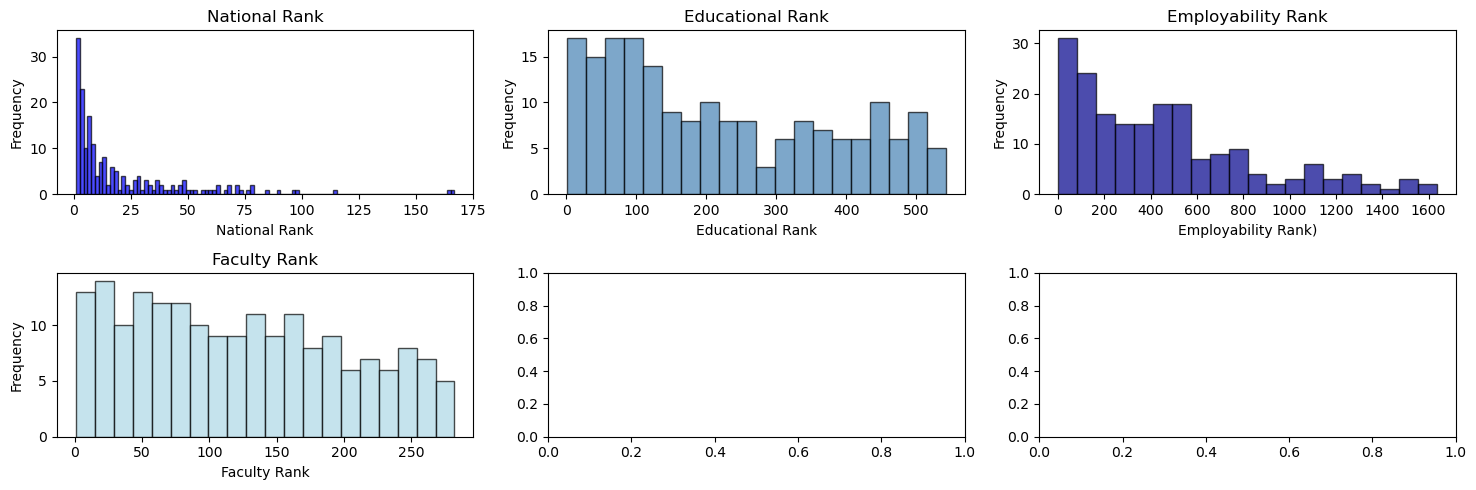

In [389]:

fig, axes = plt.subplots(2, 3, figsize=(15, 5))


axes[0][0].hist(filtered_df['National Rank'], edgecolor='black', bins=100, alpha=0.7, color='blue')
axes[0][0].set_title('National Rank')
axes[0][0].set_xlabel('National Rank')
axes[0][0].set_ylabel('Frequency')

axes[0][1].hist(filtered_df['Educational Rank'], edgecolor='black', bins=20, alpha=0.7, color='SteelBlue')
axes[0][1].set_title('Educational Rank')
axes[0][1].set_xlabel('Educational Rank')
axes[0][1].set_ylabel('Frequency')

axes[0][2].hist(filtered_df['Employability Rank'], edgecolor='black', bins=20, alpha=0.7, color='darkblue')
axes[0][2].set_title('Employability Rank')
axes[0][2].set_xlabel('Employability Rank)')
axes[0][2].set_ylabel('Frequency')

axes[1][0].hist(filtered_df['Faculty Rank'], edgecolor='black', bins=20, alpha=0.7, color='lightblue')
axes[1][0].set_title('Faculty Rank')
axes[1][0].set_xlabel('Faculty Rank')
axes[1][0].set_ylabel('Frequency')


plt.tight_layout() 
plt.show()

In [390]:
cwur_df

,Rank,persntig,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,0.1,Harvard University,USA,1,1,1,1,1,100.0
1,2,0.1,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,0.1,Stanford University,USA,3,11,4,2,2,95.2
3,4,0.1,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,0.1,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...,...
1995,1996,9.8,Chongqing Jiaotong University,China,314,0,0,0,1917,66.0
1996,1997,9.8,University of Arkansas at Little Rock,USA,332,0,1322,0,1920,66.0
1997,1998,9.8,Van Yüzüncü Yıl University,Turkey,54,0,0,0,1919,66.0
1998,1999,9.8,Bharathidasan University,India,64,0,0,0,1922,66.0


In [391]:
cwur_df['National Rank'].describe()

count    2000.000000
mean       69.245000
std        85.538608
min         1.000000
25%         9.750000
50%        33.000000
75%        89.000000
max       332.000000
Name: National Rank, dtype: float64

In [392]:
#plt.figure(figsize=(10, 6)) 
#plt.hist(cwur_df['National Rank'], bins=30, color='blue', edgecolor='black', alpha=0.7)  # رسم الهيستوغرام


#plt.title('Histogram of National Rank')
#plt.xlabel('National Rank')
#plt.ylabel('Frequency')


#plt.grid(axis='y', alpha=0.75)
#plt.show()

In [393]:
cwur_df['Educational Rank'].describe()

count    2000.000000
mean       60.042500
std       137.715284
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: Educational Rank, dtype: float64

In [394]:
cwur_df['Employability Rank'].describe()

count    2000.000000
mean      407.176000
std       539.997212
min         0.000000
25%         0.000000
50%        33.500000
75%       793.250000
max      1713.000000
Name: Employability Rank, dtype: float64

In [395]:
cwur_df['Faculty Rank'].describe()

count    2000.000000
mean       18.971000
std        56.385901
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       282.000000
Name: Faculty Rank, dtype: float64

<Axes: ylabel='Employability Rank'>

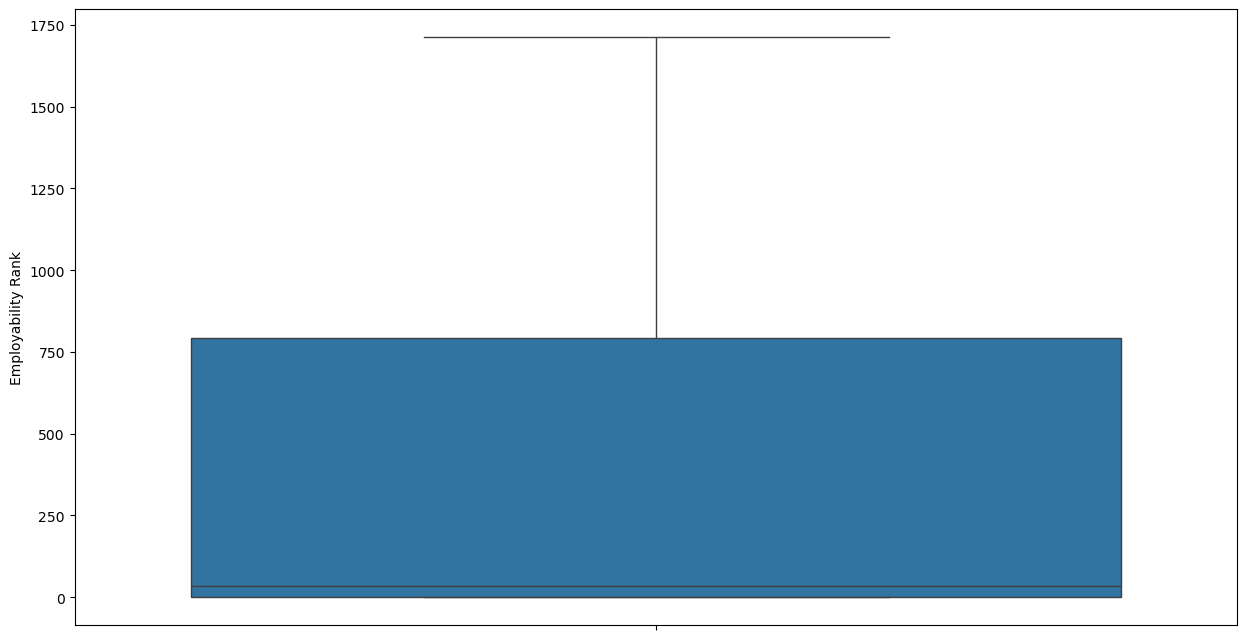

In [396]:
plt.figure(figsize=(15,8))

sns.boxplot(
    cwur_df,
    y="Employability Rank",
    
)

<Axes: ylabel='Research Rank'>

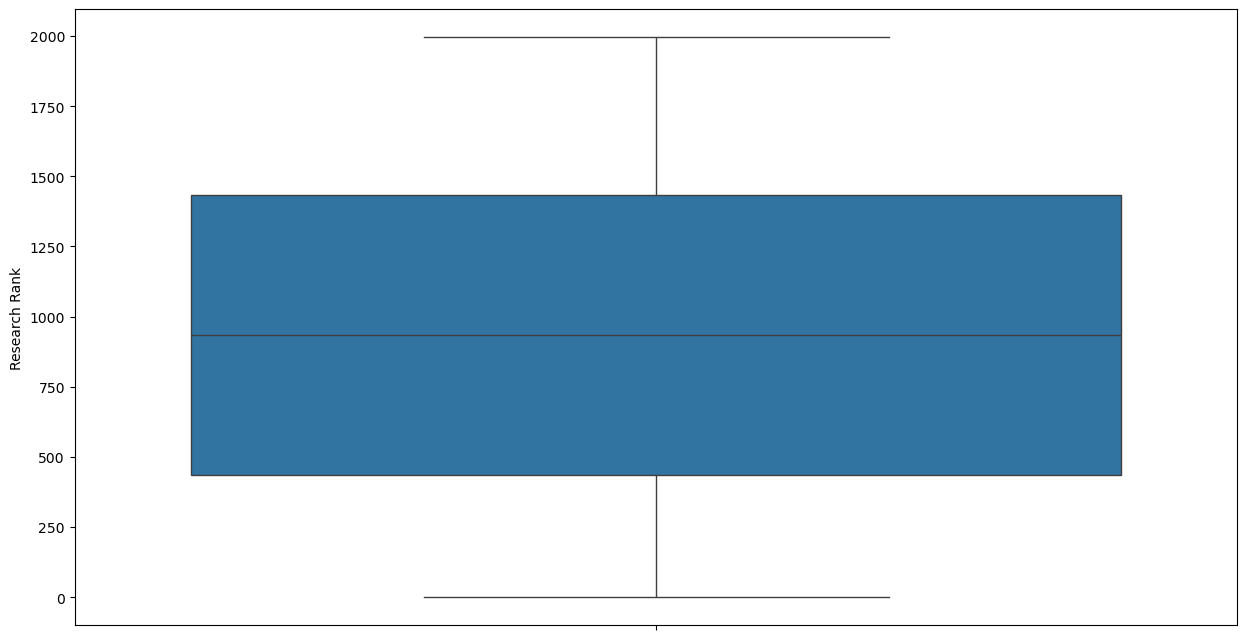

In [397]:
plt.figure(figsize=(15,8))

sns.boxplot(
    cwur_df,
    y="Research Rank",
    
)

In [398]:
cwur_df.head(10)

,Rank,persntig,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,0.1,Harvard University,USA,1,1,1,1,1,100.0
1,2,0.1,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,0.1,Stanford University,USA,3,11,4,2,2,95.2
3,4,0.1,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,0.1,University of Oxford,United Kingdom,2,7,27,9,4,93.3
5,6,0.1,Princeton University,USA,4,5,16,6,82,92.6
6,7,0.1,University of Chicago,USA,5,8,15,22,28,92.1
7,8,0.1,Columbia University,USA,6,12,14,10,13,91.6
8,9,0.1,University of Pennsylvania,USA,7,14,8,45,12,91.2
9,10,0.1,Yale University,USA,8,6,35,13,21,90.8


In [399]:
distance_counts = cwur_df["persntig"].value_counts()
distance_counts

persntig
3.4    21
4.8    21
3.3    21
6.8    21
3.6    21
       ..
5.6    20
5.8    20
6.0    20
6.2    20
9.8     9
Name: count, Length: 98, dtype: int64

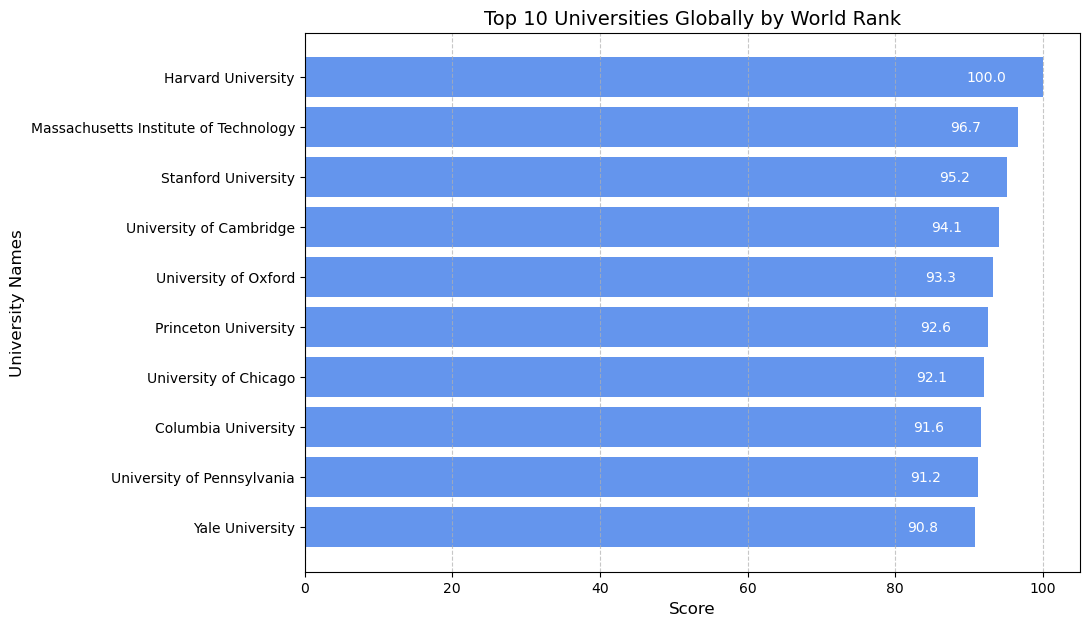

In [401]:
# Assuming you have the cleaned dataframe with 'University Names' included
cwur_df['University Names'] = cwur_df['University Names']

# Now, let's extract the top 10 universities again and visualize it
top_10_universities = cwur_df[cwur_df['Rank'] <= 10].copy()

# Extract relevant columns for visualization
top_10_data = top_10_universities[['Rank', 'University Names', 'Score']]

# Sort by 'World Rank' for better visualization
top_10_data = top_10_data.sort_values(by='Rank')

# Create a horizontal bar chart to visualize the top 10 universities
plt.figure(figsize=(10, 7))
bars = plt.barh(top_10_data['University Names'], top_10_data['Score'], color='cornflowerblue')

# Annotating the bars with the Score value
for bar in bars:
    width = bar.get_width()
    plt.text(width - 5,  # Position of the text on the x-axis
             bar.get_y() + bar.get_height()/2,  # Position of the text on the y-axis
             f'{width:.1f}',  # Format the score to one decimal place
             va='center', ha='right', color='white', fontsize=10)

plt.title('Top 10 Universities Globally by World Rank', fontsize=14)
plt.xlabel('Score', fontsize=12)
plt.ylabel('University Names', fontsize=12)
plt.gca().invert_yaxis()  # To show the best-ranked university at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [402]:
top_nat_counts = cwur_df["University Names"].head(10)
top_nat_counts

0                       Harvard University
1    Massachusetts Institute of Technology
2                      Stanford University
3                  University of Cambridge
4                     University of Oxford
5                     Princeton University
6                    University of Chicago
7                      Columbia University
8               University of Pennsylvania
9                          Yale University
Name: University Names, dtype: object

In [403]:
type(top_nat_counts)

pandas.core.series.Series

# Which universities are ranked in the top 10 globally?


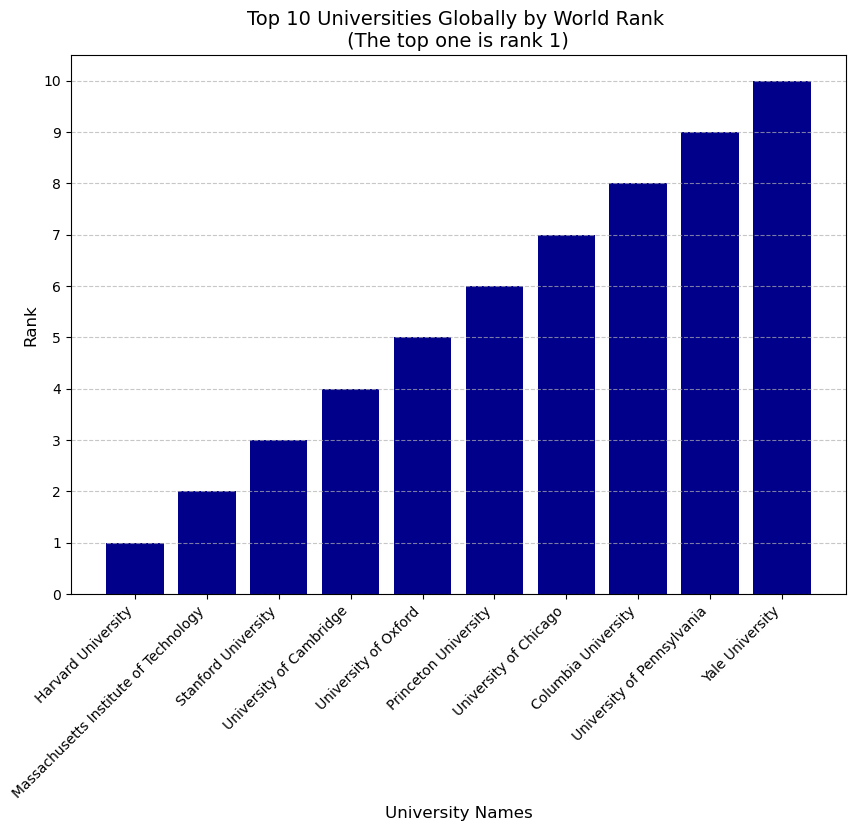

In [405]:
# Filter and sort the top 10 universities by rank
top_10_universities = cwur_df[cwur_df['Rank'] <= 10].copy()
top_10_data = top_10_universities[['Rank', 'University Names']].sort_values(by='Rank')

# Create a bar chart with university names on the x-axis and rank on the y-axis
plt.figure(figsize=(10, 7))
plt.bar(top_10_data['University Names'], top_10_data['Rank'], color='darkblue')

# Add title and labels
plt.title('Top 10 Universities Globally by World Rank \n (The top one is rank 1) ', fontsize=14)
plt.ylabel('Rank', fontsize=12)
plt.xlabel('University Names', fontsize=12)

# Rotate the university names for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 11, 1))
# Add a grid to the y-axis for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
import matplotlib.cm as cm

# Which universities are ranked in the top 10 for employment outcomes?


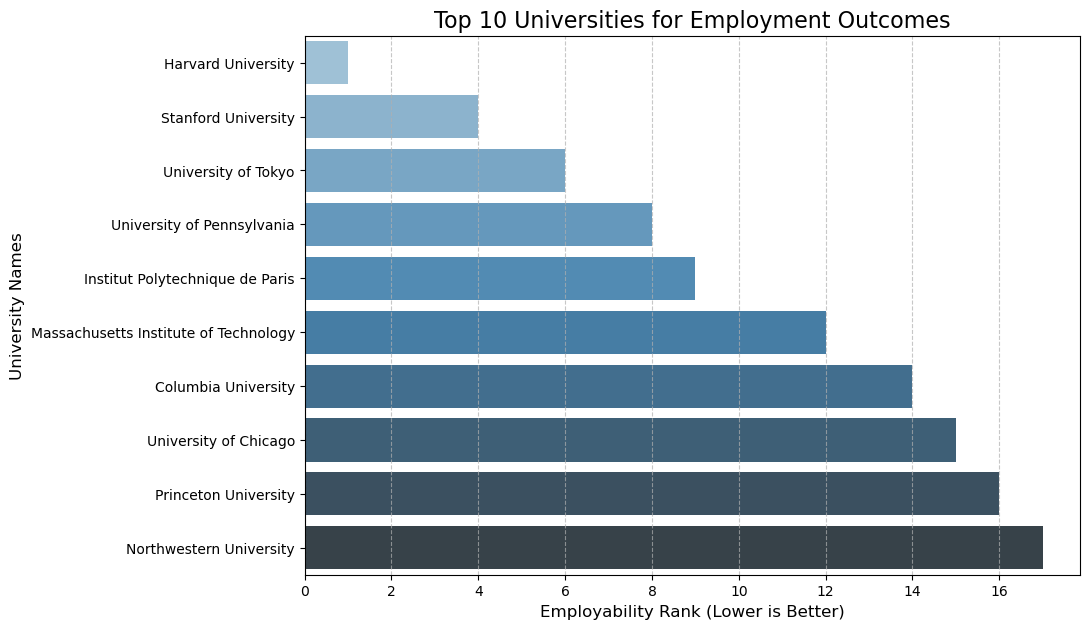

In [407]:
# Sort the dataframe by 'Employability Rank' in ascending order
cwur_df_sorted_by_employment = filtered_df.sort_values(by='Employability Rank', ascending=True)

# Select the top 10 rows after sorting
top_10_employment_universities = cwur_df_sorted_by_employment.head(10).copy()
# Create the bar plot using Seaborn
plt.figure(figsize=(10, 7))
sns.barplot(x='Employability Rank', y='University Names', 
       data=top_10_employment_universities, hue='University Names', palette='Blues_d', dodge=False)


plt.title('Top 10 Universities for Employment Outcomes', fontsize=16)
plt.xlabel('Employability Rank (Lower is Better)', fontsize=12)
plt.ylabel('University Names', fontsize=12)

# Add grid to make the chart easier to read
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()



In [408]:
cwur_df.head(10)

,Rank,persntig,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,0.1,Harvard University,USA,1,1,1,1,1,100.0
1,2,0.1,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,0.1,Stanford University,USA,3,11,4,2,2,95.2
3,4,0.1,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,0.1,University of Oxford,United Kingdom,2,7,27,9,4,93.3
5,6,0.1,Princeton University,USA,4,5,16,6,82,92.6
6,7,0.1,University of Chicago,USA,5,8,15,22,28,92.1
7,8,0.1,Columbia University,USA,6,12,14,10,13,91.6
8,9,0.1,University of Pennsylvania,USA,7,14,8,45,12,91.2
9,10,0.1,Yale University,USA,8,6,35,13,21,90.8


In [409]:
cwur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                2000 non-null   int64  
 1   persntig            2000 non-null   float64
 2   University Names    2000 non-null   object 
 3   Location            2000 non-null   object 
 4   National Rank       2000 non-null   int64  
 5   Educational Rank    2000 non-null   int64  
 6   Employability Rank  2000 non-null   int64  
 7   Faculty Rank        2000 non-null   int64  
 8   Research Rank       2000 non-null   int64  
 9   Score               2000 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 156.4+ KB


In [410]:
cwur_df

,Rank,persntig,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,0.1,Harvard University,USA,1,1,1,1,1,100.0
1,2,0.1,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,0.1,Stanford University,USA,3,11,4,2,2,95.2
3,4,0.1,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,0.1,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...,...
1995,1996,9.8,Chongqing Jiaotong University,China,314,0,0,0,1917,66.0
1996,1997,9.8,University of Arkansas at Little Rock,USA,332,0,1322,0,1920,66.0
1997,1998,9.8,Van Yüzüncü Yıl University,Turkey,54,0,0,0,1919,66.0
1998,1999,9.8,Bharathidasan University,India,64,0,0,0,1922,66.0


# What positions do Universities in SA hold within the Global Rank

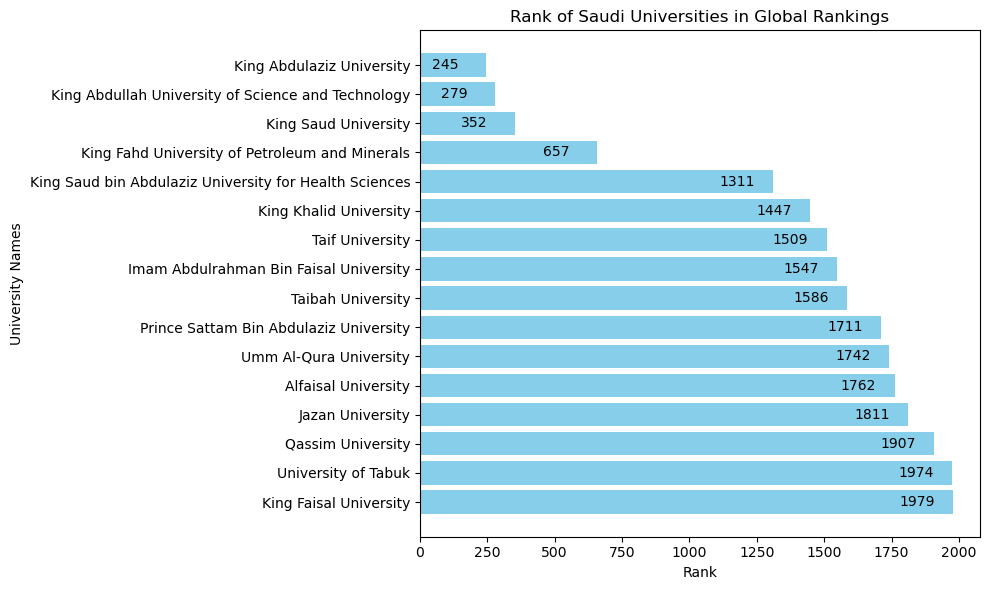

In [412]:
# Filter rows for universities located in Saudi Arabia
saudi_universities_sorted = cwur_df[cwur_df['Location '].str.contains('Saudi Arabia', na=False)]

# Create a bar plot for avg_score vs. University Name
plt.figure(figsize=(10, 6))

# Create horizontal bar chart
bars = plt.barh(saudi_universities_sorted['University Names'], saudi_universities_sorted['Rank'], color='skyblue')

# Annotating the bars with the Rank value
for bar in bars:
    width = bar.get_width()
    plt.text(width - 200,  # Position of the text on the x-axis (shift a little to the right)
             bar.get_y() + bar.get_height() / 2,  # Position of the text on the y-axis (centered vertically)
             f'{int(width)}',  # Format the rank as an integer
             va='center', ha='left', color='black', fontsize=10)  # Text properties

# Add labels and title
plt.xlabel('Rank')
plt.ylabel('University Names')
plt.title('Rank of Saudi Universities in Global Rankings')

# Invert y-axis to show the highest rank at the top
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()
plt.show()


# . Considering various factors such as employment rankings, research 
rankings, and others, which has the most significant impact on  
university's overall ranking?

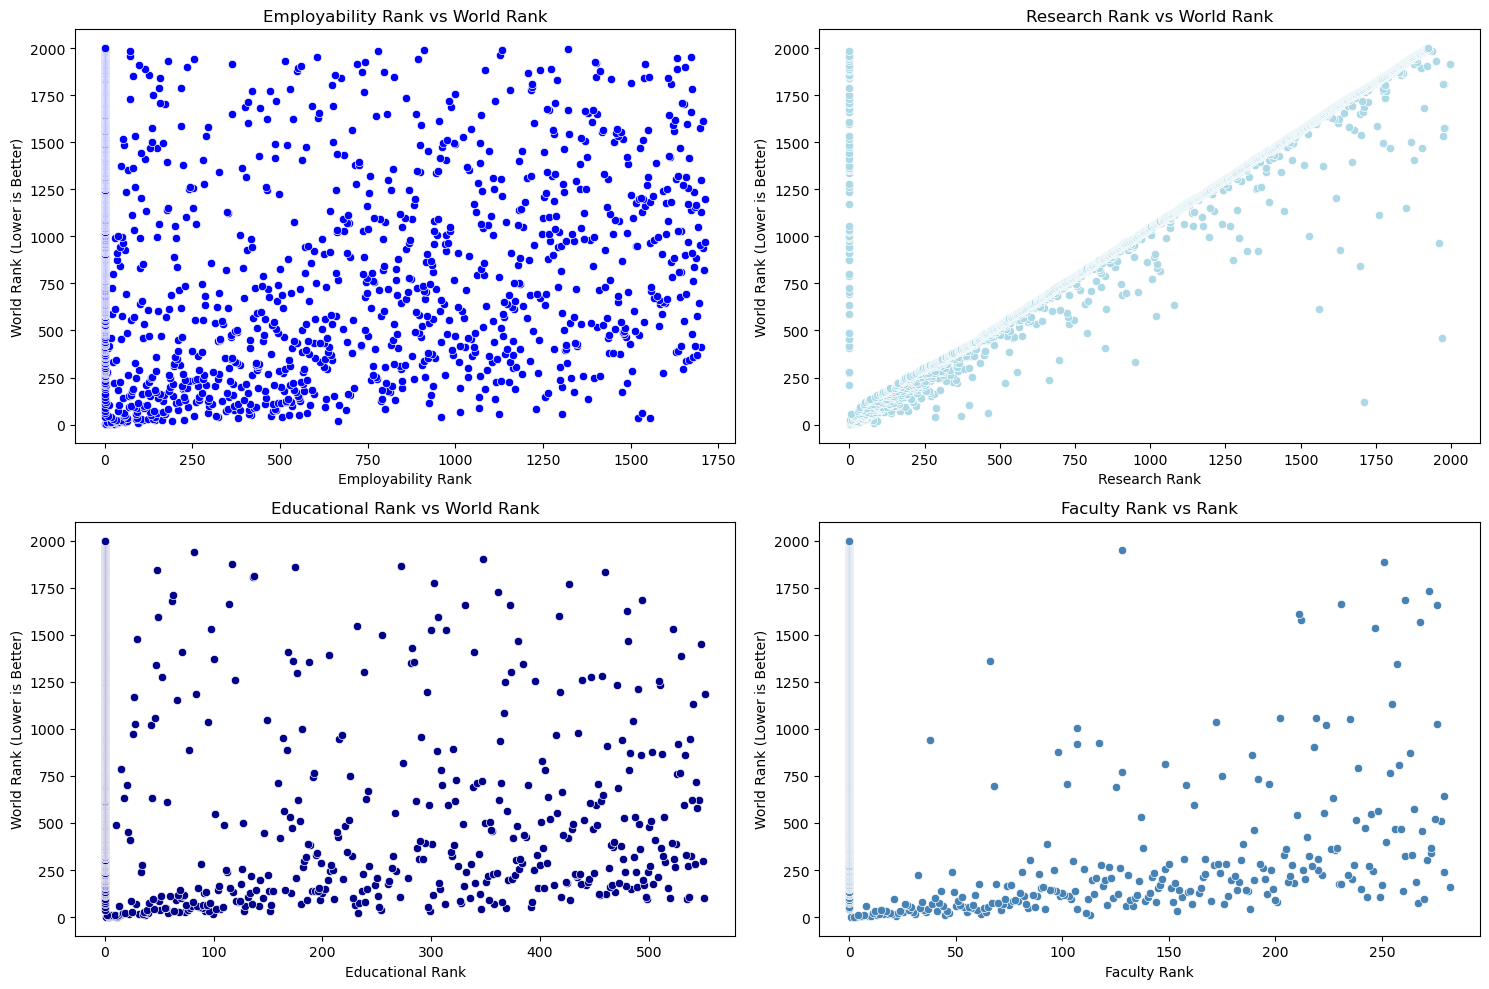

In [485]:
# Let's create scatter plots to visualize the relationship between various factors and World Rank

plt.figure(figsize=(15, 10))

# Scatter plot for Employability Rank vs World Rank
plt.subplot(2, 2, 1)
sns.scatterplot(x='Employability Rank', y='Rank', data=cwur_df, color='blue')
plt.title('Employability Rank vs World Rank')
plt.xlabel('Employability Rank')
plt.ylabel('World Rank (Lower is Better)')

# Scatter plot for Research Rank vs World Rank
plt.subplot(2, 2, 2)
sns.scatterplot(x='Research Rank', y='Rank', data=cwur_df, color='lightblue')
plt.title('Research Rank vs World Rank')
plt.xlabel('Research Rank')
plt.ylabel('World Rank (Lower is Better)')

# Scatter plot for Educational Rank vs World Rank
plt.subplot(2, 2, 3)
sns.scatterplot(x='Educational Rank', y='Rank', data=cwur_df, color='darkblue')
plt.title('Educational Rank vs World Rank')
plt.xlabel('Educational Rank')
plt.ylabel('World Rank (Lower is Better)')

# Scatter plot for Faculty Rank vs World Rank
plt.subplot(2, 2, 4)
sns.scatterplot(x='Faculty Rank', y='Rank', data=cwur_df, color='SteelBlue')
plt.title('Faculty Rank vs Rank')
plt.xlabel('Faculty Rank')
plt.ylabel('World Rank (Lower is Better)')

plt.tight_layout()
plt.show()


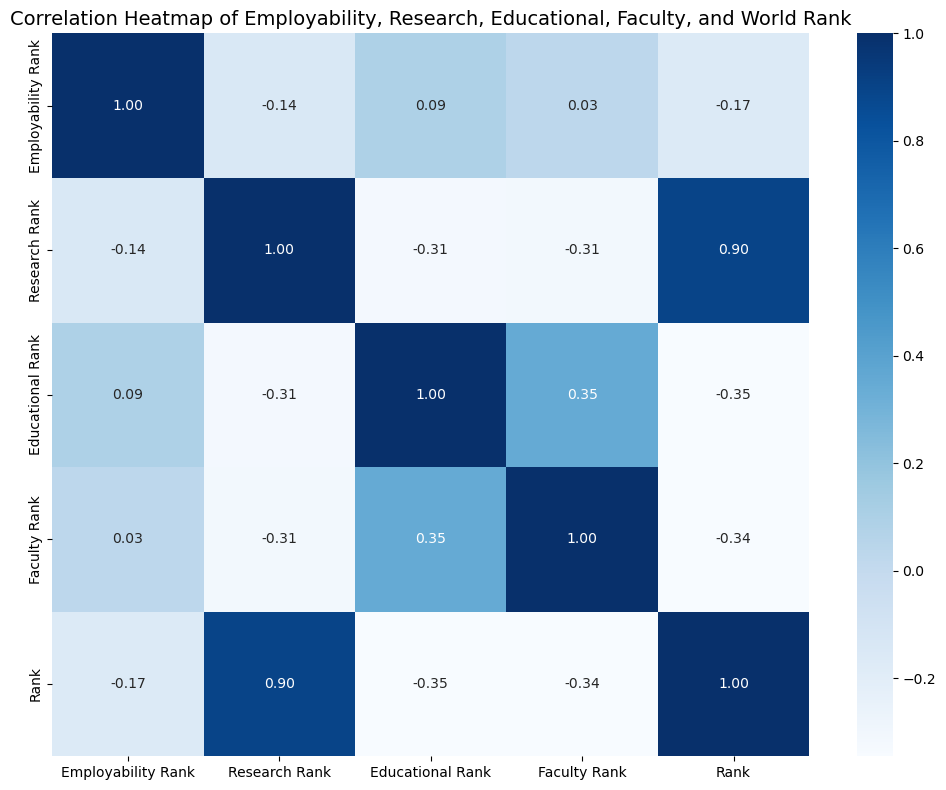

In [483]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new dataframe with the relevant columns
heatmap_df = cwur_df[['Employability Rank', 'Research Rank', 'Educational Rank', 'Faculty Rank', 'Rank']]

# Calculate the correlation matrix
correlation_matrix = heatmap_df.corr()

# Create a heatmap to visualize the correlation between the factors and World Rank
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')

# Add title
plt.title('Correlation Heatmap of Employability, Research, Educational, Faculty, and World Rank', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


# Considering various factors such as employment rankings, research 
rankings, and others, which has the most significant impact on a
university's overall ranking?

C:\Users\User\AppData\Local\Temp\ipykernel_3508\1768959049.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20', len(countries))


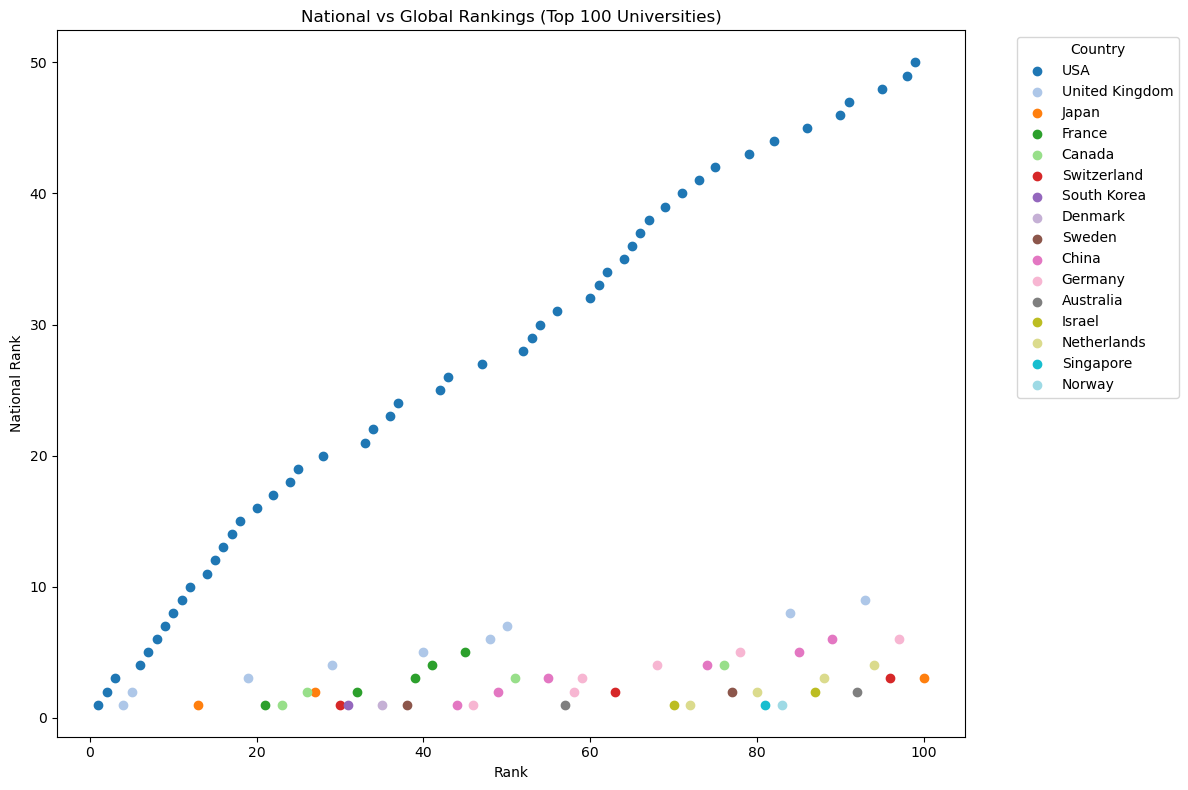

In [417]:
# Remove extra space in the 'Location' column
cwur_df.rename(columns={'Location ': 'Location'}, inplace=True)

# Filter the data for the top 100 universities by World Rank
top_100_df = cwur_df[cwur_df['Rank'] <= 100]

# Plot the relationship between National Rank and World Rank for the top 100 universities, assigning a color to each country
countries = top_100_df['Location'].unique()

# Generate a color map based on the number of unique countries
color_map = cm.get_cmap('tab20', len(countries))

plt.figure(figsize=(12, 8))

# Scatter plot with distinct colors for each country
for i, country in enumerate(countries):
    country_data = top_100_df[top_100_df['Location'] == country]
    plt.scatter(country_data['Rank'], country_data['National Rank'], label=country, color=color_map(i))

plt.xlabel('Rank')
plt.ylabel('National Rank')
plt.title('National vs Global Rankings (Top 100 Universities)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()